## Data Story and Visualization

This is the import of all the python packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import matplotlib as mpl
from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
## This is the working directory I saved for latter use

work_directory=os.getcwd()
work_directory

'C:\\Users\\Tsymbal Group Member\\OneDrive - University of Nebraska-Lincoln\\data_camp\\Springbroad\\SpringBoard_Projects\\project_data'

## Map visulization of the Happniess Score

The dataset **2012_0.csv** is part of the dataset I got from gallup world happiness investigation. This is only for the year 2012

In [3]:
df=pd.read_csv(work_directory+'\\2012_0.csv', sep=', ', delimiter=',')
dff=df.drop('Unnamed: 0',axis=1)
dff.head()

,﻿WP5 Country,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13"
0,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN,NaN
1,Albania,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.2896,0.305000
2,Algeria,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,NaN
3,Angola,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,NaN,0.473400
4,Argentina,Argentina,2012,6.468387,NaN,0.418255,0.901776,66.838005,NaN,0.4249,0.479421


This is the dataset from where we can get the ISO 3166 alpha-3 country code. This dataset ***is not*** is to model the trends, is only for the world map visualization

In [4]:
country_code=pd.read_csv(work_directory+'\\slim-3.csv', sep=', ', delimiter=',')
country_code=country_code.rename(columns={'name': 'country'})
country_code.head(5)

,country,alpha-3
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


In [41]:
##  I merged this two dataset based on the 2012_0, since it is the dataset where we have all the features

dfs=dff.merge(country_code,on='country')
dfs.head()

,﻿WP5 Country,country,year,Life Ladder,Log GDP per capita,Confidence in national government,Social support,Healthy life expectancy at birth,Generosity,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13",alpha-3
0,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.435440,0.520637,48.738346,0.247900,NaN,NaN,AFG
1,Albania,Albania,2012,5.510124,9.189268,0.364894,0.784502,67.942978,-0.169465,0.2896,0.305000,ALB
2,Algeria,Algeria,2012,5.604596,9.487703,NaN,0.839397,64.001305,-0.198894,NaN,NaN,DZA
3,Angola,Angola,2012,4.360250,8.886378,0.237091,0.752593,44.400314,-0.138073,NaN,0.473400,AGO
4,Argentina,Argentina,2012,6.468387,NaN,0.418255,0.901776,66.838005,NaN,0.4249,0.479421,ARG


In [46]:
# data for the map

data_map=dfs[['country','alpha-3','year','Life Ladder']]
data_map.head()

,country,alpha-3,year,Life Ladder
0,Afghanistan,AFG,2012,3.782938
1,Albania,ALB,2012,5.510124
2,Algeria,DZA,2012,5.604596
3,Angola,AGO,2012,4.360250
4,Argentina,ARG,2012,6.468387


### Starting from this line, the reset of the code till the map visulization is used for the purpose of plotting. The code is basically from the tutorial: (http://ramiro.org/notebook/basemap-choropleth/)

In [47]:
shapefile = work_directory+'\\countries\\ne_10m_admin_0_countries'
num_colors = 9
year = '2012'
cols = ['country', 'alpha-3', year]
title = 'Happiness score {}'.format(year)

In [48]:
gc = GeonamesCache()
iso2_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [49]:
data_map.set_index('alpha-3', inplace=True)
data_map = data_map.ix[iso2_codes].dropna()
data_map.ix['SSD']

country        South Sudan
year                  2012
Life Ladder         4.5505
Name: SSD, dtype: object

In [50]:
values = data_map['Life Ladder']
cm = plt.get_cmap('Spectral')
scheme = [cm(i*30) for i in range(num_colors)][::-1]
# scheme=[(15,75,50,0),(3,57,63,0),(0,32,55,0),(0,12,42,0),(0,0,25,0),(10,0,40,0),(33,0,33,0),(60,0,30,0),(82,23,0,0)]
bins = np.linspace(values.min(), values.max(), num_colors)
data_map['bin'] = np.digitize(values, bins) - 1 
data_map.sort_values('bin', ascending=False).head()

,country,year,Life Ladder,bin
alpha-3,,,,
CHE,Switzerland,2012.0,7.776209,8
AUT,Austria,2012.0,7.400689,7
NLD,Netherlands,2012.0,7.470716,7
ARE,United Arab Emirates,2012.0,7.217767,7
DNK,Denmark,2012.0,7.519909,7


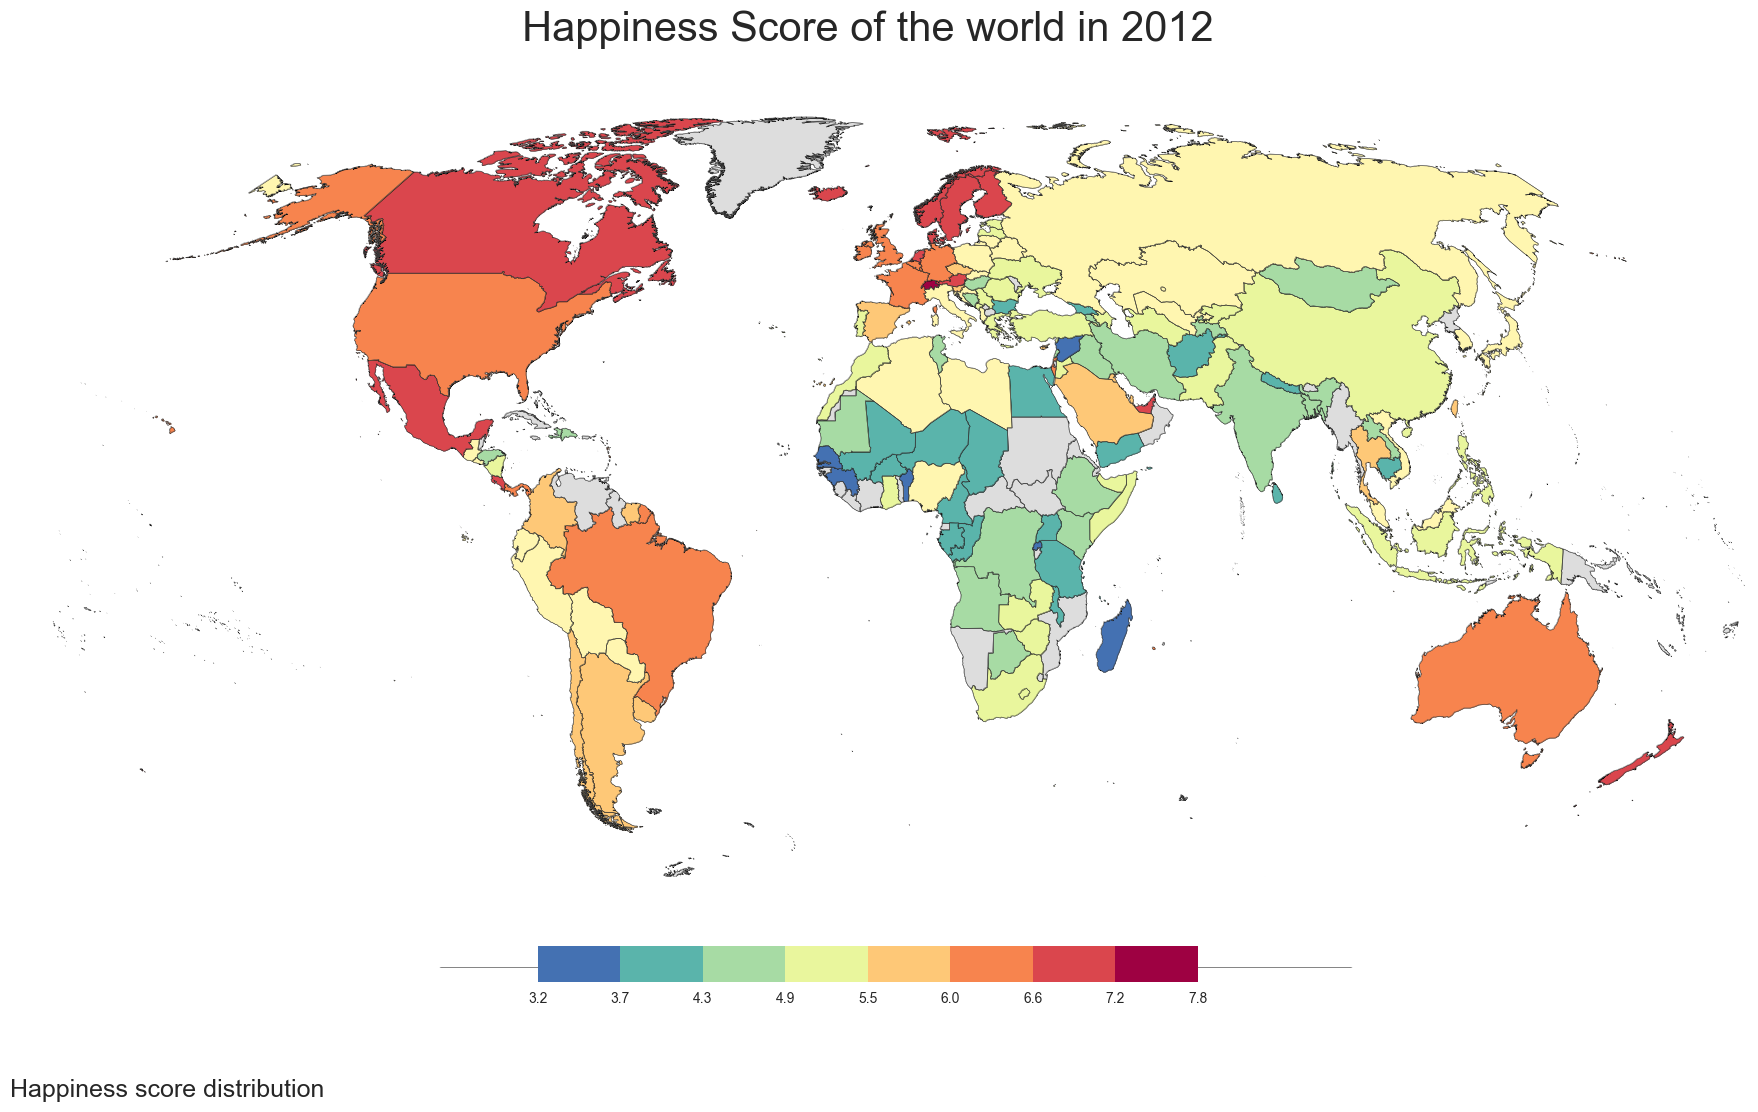

In [51]:
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Happiness Score of the world in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')


m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso2 = info['ADM0_A3_US']
    if iso2 not in data_map.index:
        color = '#dddddd'
    else:
        color = scheme[data_map.ix[iso2]['bin']]
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)


# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
description="Happiness score distribution"
plt.annotate(description, xy=(-.8, -3.2), size=18, xycoords='axes fraction')

# plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)
plt.show()

The gray area is because of lacking of data. However, for south sudan, Basemap can only show the contour. The country has the darker red means it has a high happiness score. From this distribution, we can see the basic trend is that for countries in American and Europe, they have a high happiness score, but the country in affrica, it has lower happiness score. This indeed has some relation with the country's developing level